# Create figure 3
In this workbook, the goal is to create all of figure 2 programmatically. Figure 2 is meant to be a summary of the data from DBTL0, including isoprenol titers and proteomics filtering.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import sys
sys.path.insert(0, '../')
from utils import set_plot_config
from utils import set_plot_config
plot_config, palette = set_plot_config(return_configs=True)

In [3]:
OUTPUT_DIR = './figure files/figure 3/'

## Import data

In [4]:
df_target = pd.read_csv('../DBTL0_results/df_targets_final.csv')
df_isoprenol = pd.read_csv('../DBTL0_results/df_isoprenol_final.csv')
target_id = pd.read_csv('../DBTL0_results/filtered_target_identity.csv')

In [5]:
df_target['is_stat_row'] = df_target['Strain'].apply(lambda x: 'Library' in x)

In [6]:
df_target.head(3)

,Strain,PP_0001,PP_0168,PP_0226,PP_0338,PP_0368,PP_0437,PP_0528,PP_0582,PP_0597,...,PP_5419,Isoprenol mean,dCas9,Target,CV[%],Target:Control,Target:Library_mean,Target:Library_Q1,to_keep,is_stat_row
0,IY1586,0.918049,1.305330,1.297028,0.876275,0.834709,1.151605,1.159695,1.046509,0.802560,...,0.346177,201.787890,0.654754,PP_4549,1.258799,0.051375,0.074068,0.088727,True,False
1,IY1587,0.628591,0.637950,0.630554,0.766956,0.708363,0.840861,0.922574,0.582428,0.920302,...,0.162470,102.968377,0.474752,PP_4550,8.410109,0.585066,0.227070,0.684081,True,False
2,IY1588,0.702731,1.628167,2.243601,1.175192,0.032587,0.994764,1.060118,0.876955,0.765457,...,0.854964,236.680533,0.944585,PP_0368,4.072284,0.032587,0.038346,0.048219,True,False


In [7]:
df_isoprenol.head(3)

,Strain,Isoprenol,Target,CV[%]
0,IY2020,412.20373,PP_5419,5.359461
1,IY1688,402.64727,PP_0528,2.279287
2,IY1688,393.75147,PP_0528,2.279287


In [8]:
target_id.head(3)

,Strain,Target,Isoprenol mean,Weight
0,IY1586,PP_4549,201.787890,17
1,IY1587,PP_4550,102.968377,11
2,IY1588,PP_0368,236.680533,19


## Import COG information

In [9]:
# cog_codex = pd.read_csv('241117_Codex.csv')
# cogs = pd.read_csv('241117_COGs.csv')
# cogs_c_zoom = pd.read_csv('241126_COG_C_Zoom.csv')
# cogs_i_zoom = pd.read_csv('241126_COG_I_Zoom.csv')

In [10]:
cog_codex = pd.read_csv('241117_Codex.csv')
cog_codex

,Letter,Function,Description
0,J,"Translation, ribosomal structure and biogenesis",Information storage and processing
1,A,RNA processing and modification,Information storage and processing
2,K,Transcription,Information storage and processing
3,L,"Replication, recombination and repair",Information storage and processing
4,B,Chromatin structure and dynamics,Information storage and processing
5,D,"Cell cycle control, cell division, chromosome ...",Cellular processes and signaling
6,Y,Nuclear structure,Cellular processes and signaling
7,V,Defense mechanisms,Cellular processes and signaling
8,T,Signal transduction mechanisms,Cellular processes and signaling
9,M,Cell wall/membrane/envelope biogenesis,Cellular processes and signaling


In [11]:
cogs = pd.read_csv('241117_COGs.csv')
cogs

,From,Locus,Source,To,Letter,Func
0,P0A151,PP_0001,FluxRETAP,COG1475,D,"Chromosome segregation protein Spo0J, contains..."
1,Q88RM6,PP_0103,FluxRETAP,COG1622,C,"Heme/copper-type cytochrome/quinol oxidase, su..."
2,Q88RM5,PP_0104,FluxRETAP,COG0843,C,"Heme/copper-type cytochrome/quinol oxidase, su..."
3,Q88RM4,PP_0105,FluxRETAP,COG3175,O C,Cytochrome c oxidase assembly protein Cox11
4,Q88RM3,PP_0106,FluxRETAP,COG1845,C,"Heme/copper-type cytochrome/quinol oxidase, su..."
...,...,...,...,...,...,...
122,Q88C48,PP_5335,Heuristics,COG0026,F,Phosphoribosylaminoimidazole carboxylase (NCAI...
123,Q88BX1,PP_5416,Heuristics,COG0712,C,"FoF1-type ATP synthase, delta subunit"
124,Q88BX0,PP_5417,Heuristics,COG0711,C,"FoF1-type ATP synthase, membrane subunit b or b'"
125,Q88BW8,PP_5419,Heuristics,COG0356,C,"FoF1-type ATP synthase, membrane subunit a"


In [12]:
cogs_c_zoom = pd.read_csv('241126_COG_C_Zoom.csv')
cogs_c_zoom

,From,Locus,Source,To,Letter,Pathway,Func
0,Q88RM6,PP_0103,FluxRETAP,COG1622,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."
1,Q88RM5,PP_0104,FluxRETAP,COG0843,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."
2,Q88RM3,PP_0106,FluxRETAP,COG1845,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."
3,Q88QZ6,PP_0338,Heuristics,COG0508,C,Pyruvate metabolism,"Pyruvate/2-oxoglutarate dehydrogenase complex,..."
4,Q88Q44,PP_0654,Heuristics,COG0039,C,TCA cycle,Malate/lactate dehydrogenase
5,Q88PS4,PP_0774,Heuristics,COG0280,C,Pyruvate metabolism,"Phosphotransacetylase (includes Pta, EutD and ..."
6,Q88PN7,PP_0812,FluxRETAP,COG1622,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."
7,Q88PN6,PP_0813,FluxRETAP,COG0843,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."
8,Q88PN5,PP_0814,FluxRETAP,COG1845,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."
9,Q88PN4,PP_0815,FluxRETAP,COG3125,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."


In [13]:
cogs_i_zoom = pd.read_csv('241126_COG_I_Zoom.csv')
cogs_i_zoom

,From,Locus,Source,To,Letter,Pathway,Func
0,Q88QW6,PP_0368,Heuristics,COG1960,I,β-Oxidation,Acyl-CoA dehydrogenase related to the alkylati...
1,Q88QB2,PP_0582,Heuristics,COG0183,I,β-Oxidation,Acetyl-CoA acetyltransferase
2,Q88Q97,PP_0597,Heuristics,COG1012,I,Fatty acid biosynthesis,Acyl-CoA reductase or other NAD-dependent alde...
3,Q88MG4,PP_1607,Heuristics,COG0825,I,Fatty acid biosynthesis,Acetyl-CoA carboxylase alpha subunit
4,Q88L02,PP_2136,Heuristics,COG1250,I,β-Oxidation,3-hydroxyacyl-CoA dehydrogenase
5,Q88L01,PP_2137,Heuristics,COG0183,I,β-Oxidation,Acetyl-CoA acetyltransferase
6,Q88KS6,PP_2213,Heuristics,COG0365,I,Acetyl-CoA biosynthesis,Acyl-coenzyme A synthetase/AMP-(fatty) acid li...
7,Q88JR0,PP_2589,Heuristics,COG1012,I,Fatty acid biosynthesis,Acyl-CoA reductase or other NAD-dependent alde...
8,Q88IC8,PP_3071,Heuristics,COG0365,I,Acetyl-CoA biosynthesis,Acyl-coenzyme A synthetase/AMP-(fatty) acid li...
9,Q88I79,PP_3122,Heuristics,COG1788,I,β-Oxidation,"Acyl CoA:acetate/3-ketoacid CoA transferase, a..."


### add column for filtering in df_target

In [14]:
passing_strains = target_id['Strain'].unique()
df_target['passed_filter'] = df_target['Strain'].apply(lambda x: x in passing_strains)

### Extract/define some useful values

In [15]:
control_isoprenol_mean = df_isoprenol.loc[df_isoprenol['Strain'] == 'NT', 'Isoprenol'].mean()
user_added_targets = ['PP_0814', 'PP_0815']
user_added_strains = [target_id.loc[target_id['Target'] == t, 'Strain'] for t in user_added_targets]
assert all([len(s)==1 for s in user_added_strains])
user_added_strains = [s.values[0] for s in user_added_strains]

In [16]:
user_added_targets

['PP_0814', 'PP_0815']

In [17]:
def label_filter_results(x):
    if x in user_added_strains:
        return 'Manually added'
    elif x in passing_strains:
        return 'Passed Filter'
    else:
        return 'Failed Filter'
    
df_target['Filter Result'] = df_target['Strain'].apply(label_filter_results)

## Add COG information to dataframes


In [18]:
cogs_c_zoom.head(3)

,From,Locus,Source,To,Letter,Pathway,Func
0,Q88RM6,PP_0103,FluxRETAP,COG1622,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."
1,Q88RM5,PP_0104,FluxRETAP,COG0843,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."
2,Q88RM3,PP_0106,FluxRETAP,COG1845,C,Oxidative phosphorylation,"Heme/copper-type cytochrome/quinol oxidase, su..."


In [19]:
cogs_i_zoom.head(3)

,From,Locus,Source,To,Letter,Pathway,Func
0,Q88QW6,PP_0368,Heuristics,COG1960,I,β-Oxidation,Acyl-CoA dehydrogenase related to the alkylati...
1,Q88QB2,PP_0582,Heuristics,COG0183,I,β-Oxidation,Acetyl-CoA acetyltransferase
2,Q88Q97,PP_0597,Heuristics,COG1012,I,Fatty acid biosynthesis,Acyl-CoA reductase or other NAD-dependent alde...


In [20]:
cog_locus_letter_dict = dict(zip(cogs['Locus'], cogs['Letter']))
cog_letter_function_dict = dict(zip(cog_codex['Letter'], cog_codex['Function']))
cog_letter_description_dict = dict(zip(cog_codex['Letter'], cog_codex['Description']))

df_target.loc[:, 'has_cog'] = df_target.loc[:, 'Target'].apply(lambda x: x in cogs['Locus'].values)

df_target['cog_base'] = df_target.loc[~df_target['is_stat_row'], 'Target'].map(cog_locus_letter_dict)
df_target['cog_base_length'] = df_target.loc[df_target['has_cog'], 'cog_base'].apply(lambda x: len(x.split(' ')))
df_target['cog_base1'] = df_target.loc[df_target['has_cog'], 'cog_base'].apply(lambda x: x[0])

df_target.loc[(~df_target['has_cog']) & ~(df_target['is_stat_row']), 'cog_base'] = 'missing'


df_target.loc[df_target['has_cog'], 'cog_base_function'] = df_target.loc[df_target['has_cog'], 'cog_base1'].map(cog_letter_function_dict)
df_target.loc[df_target['has_cog'], 'cog_base_description'] = df_target.loc[df_target['has_cog'], 'cog_base1'].map(cog_letter_description_dict)

Add information for COGS C and I

In [21]:
cog_locus_pathway_dict_zoomC = dict(zip(cogs_c_zoom['Locus'], cogs_c_zoom['Pathway']))
cog_locus_function_dict_zoomC = dict(zip(cogs_c_zoom['Locus'], cogs_c_zoom['Pathway']))

cog_locus_pathway_dict_zoomI = dict(zip(cogs_i_zoom['Locus'], cogs_i_zoom['Pathway']))
cog_locus_function_dict_zoomI = dict(zip(cogs_i_zoom['Locus'], cogs_i_zoom['Pathway']))

In [22]:
df_target.loc[
    (df_target['cog_base1'] == 'C'),
    'pathway_zoom'
] = df_target.loc[(df_target['cog_base1'] == 'C'), 'Target'].map(cog_locus_pathway_dict_zoomC)

df_target.loc[
    (df_target['cog_base1'] == 'I'),
    'pathway_zoom'
] = df_target.loc[(df_target['cog_base1'] == 'I'), 'Target'].map(cog_locus_pathway_dict_zoomI)

### Remove stats from dataframe

In [23]:
df_target.columns[-15:]

Index(['CV[%]', 'Target:Control', 'Target:Library_mean', 'Target:Library_Q1',
       'to_keep', 'is_stat_row', 'passed_filter', 'Filter Result', 'has_cog',
       'cog_base', 'cog_base_length', 'cog_base1', 'cog_base_function',
       'cog_base_description', 'pathway_zoom'],
      dtype='object')

In [24]:
df_target_nostats = df_target[~df_target['is_stat_row']]

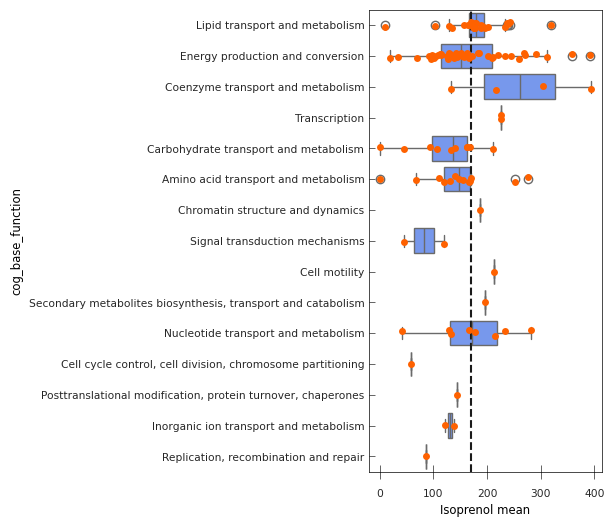

In [25]:
fig, ax = plt.subplots(figsize = (3, 6))
sns.boxplot(
    data = df_target,
    x = 'Isoprenol mean', 
    y = 'cog_base_function',
    ax = ax
)
sns.stripplot(
    data = df_target,
    x = 'Isoprenol mean', 
    y = 'cog_base_function',
    ax = ax
)
ax.axvline(df_target.loc[df_target['Strain'] == 'NT', 'Isoprenol mean'].values[0],
           c = 'k',
           linestyle = '--')

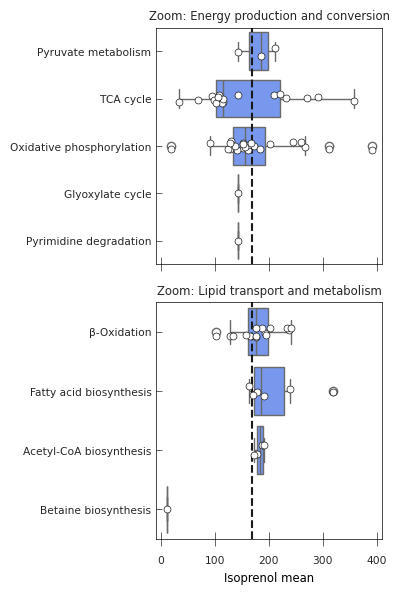

In [26]:
ZOOM_COGS = ['C', 'I']
fig, ax = plt.subplots(nrows = 2, figsize = (4, 6), sharex = True)

for letter, a in zip(ZOOM_COGS, ax):
    sns.boxplot(
        data = df_target[df_target['cog_base1'] == letter],
        x = 'Isoprenol mean', 
        y = 'pathway_zoom',
        ax = a
    )
    sns.stripplot(
        data = df_target[df_target['cog_base1'] == letter],
        x = 'Isoprenol mean', 
        y = 'pathway_zoom',
        ax = a,
        c = 'w',
        edgecolor = 'k',
        linewidth = 0.5,
    )
    a.axvline(df_target.loc[df_target['Strain'] == 'NT', 'Isoprenol mean'].values[0],
               c = 'k',
               linestyle = '--')
    a.set_title(f'Zoom: {cog_letter_function_dict[letter]}')
    a.set_ylabel('')
fig.tight_layout()

In [27]:
plot_order = df_target['cog_base_function'].value_counts().sort_values(ascending = False).index.to_list()
plot_order

['Energy production and conversion',
 'Lipid transport and metabolism',
 'Amino acid transport and metabolism',
 'Carbohydrate transport and metabolism',
 'Nucleotide transport and metabolism',
 'Coenzyme transport and metabolism',
 'Transcription',
 'Signal transduction mechanisms',
 'Inorganic ion transport and metabolism',
 'Chromatin structure and dynamics',
 'Cell motility',
 'Secondary metabolites biosynthesis, transport and catabolism',
 'Cell cycle control, cell division, chromosome partitioning',
 'Posttranslational modification, protein turnover, chaperones',
 'Replication, recombination and repair']

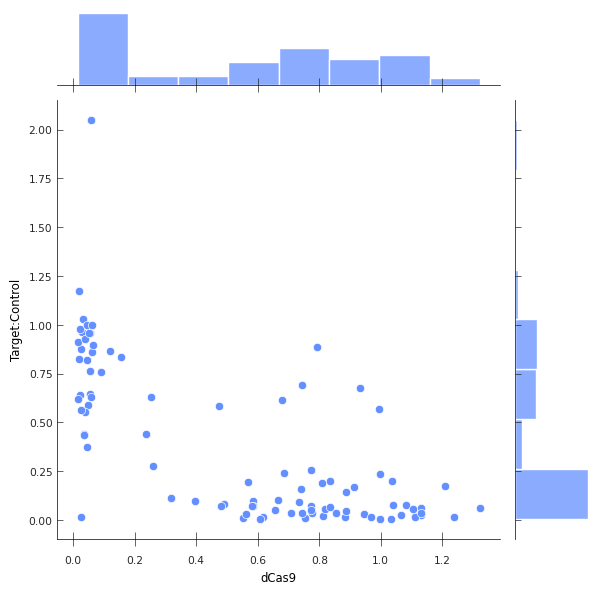

In [28]:
sns.jointplot(
    data = df_target[df_target['Target:Control']<3],
    x = 'dCas9', 
    y = 'Target:Control',
    # hue = 'cog_base_function'
)
# ax.set_ylim([0, 5])


(0.0, 2.2)

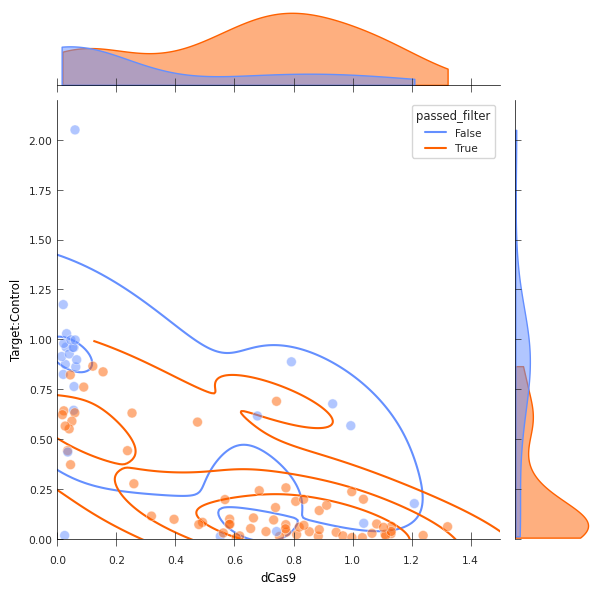

In [29]:
g = sns.JointGrid(
    data = df_target[df_target['Target:Control']<3],
    x = 'dCas9',
    y = 'Target:Control',
    hue = 'passed_filter',
)
g.plot_joint(sns.scatterplot, s = 50, alpha = 0.5)
g.plot_marginals(sns.kdeplot, cut = 0, fill = True, alpha = 0.5)
g.plot_joint(sns.kdeplot, zorder=0, levels=4, cut = 1, fill = False)
g.ax_marg_x.set_xlim([0, 1.5])
g.ax_marg_y.set_ylim([0, 2.2])

## Create plots

### Plot distributions of titer and target downregulation by COG

/tmp/ipykernel_11956/4029515640.py:60: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_11956/4029515640.py:75: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.stripplot(


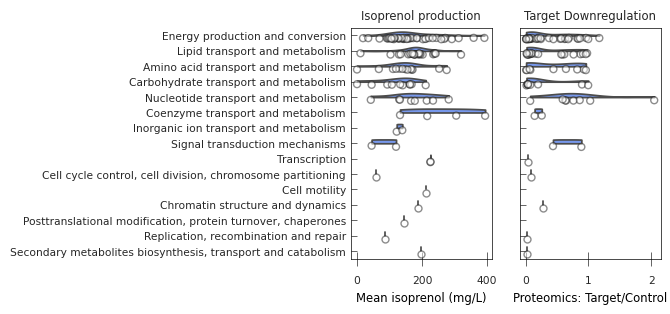

In [30]:
def plot_distributions_by_cog(df = df_target, out_dir = None):
    fig, ax = plt.subplots(ncols = 2, figsize = (4, 3), sharey = True)
    #Make a new dataframe to use for plotting
    df_plot = df_target.copy(deep = True)
    #Create a new empty row at the end of the dataframe
    df_plot.loc[len(df_plot)] = pd.Series(dtype='float64')
    #Create a fake categorical variable to use to offset the violin and swarm plot elements
    df_plot['fake_var'] = False
    #Set one entry to True so the offset will be used.
    df_plot.iloc[-1,-1] = True
    plot_order = df_target.value_counts('cog_base_function').sort_values(ascending = False).index

    idx_to_plot = (df_plot['Target:Control']<3) | (df_plot['Target:Control'].isna())
    
    #Add violin plots
    ## Shared violin parameters
    violin_cut = 0
    violin_bw_adjust = 0.8
    violin_width = 0.5
    violin_density_norm = 'width'

    ## Create violin plots
    sns.violinplot(
        data = df_plot,
        x = 'Isoprenol mean', 
        y = 'cog_base_function',
        hue = 'fake_var',
        ax = ax[0], 
        order=plot_order,
        cut = violin_cut,
        density_norm = violin_density_norm,
        bw_adjust=violin_bw_adjust,
        width = violin_width,
        split = True,
        inner = None,
        dodge = True
    )

    sns.violinplot(
        data = df_plot[idx_to_plot],
        x = 'Target:Control', 
        y = 'cog_base_function',
        hue = 'fake_var',
        ax = ax[1], 
        order=plot_order,
        cut = violin_cut,
        density_norm = violin_density_norm,
        bw_adjust=violin_bw_adjust,
        width = violin_width,
        split = True,
        inner = None,
        dodge = True
    )

    #Add strip plots
    ## Update fake variable to provide offset
    df_plot['fake_var'] = True
    #Set one entry to True so the offset will be used.
    df_plot.iloc[-1,-1] = False
    sns.stripplot(
        data = df_plot,
        x = 'Isoprenol mean', 
        y = 'cog_base_function',
        hue = 'fake_var',
        ax = ax[0], 
        order=plot_order,
        dodge = True,
        color = 'white',
        edgecolor = 'k',
        linewidth = 1,
        alpha = 0.5,
        s = 5
    )

    sns.stripplot(
        data = df_plot[idx_to_plot],
        x = 'Target:Control', 
        y = 'cog_base_function',
        hue = 'fake_var',
        ax = ax[1], 
        order=plot_order,
        dodge = True,
        color = 'white',
        edgecolor = 'k',
        linewidth = 1,
        alpha = 0.5, 
        s = 5,
    )

    ax[0].set_title('Isoprenol production')
    ax[0].set_ylabel('')
    ax[0].set_xlabel('Mean isoprenol (mg/L)')
    ax[0].get_legend().remove()

    ax[1].set_xlabel('Proteomics: Target/Control')
    ax[1].set_title('Target Downregulation')
    ax[1].get_legend().remove()

    if out_dir is not None:
        figname = 'isoprenol_and_target_distributions_split_by_COG'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')
plot_distributions_by_cog()

### plot fake data for example of filtering

In [31]:
import scipy.stats as stats

Define function for populating the example filtering figure

In [32]:
def plot_proteomics_filter_examples(ax = None):
    """
    Generate three distributions as examples of protoemics filtering:
    1) library distribution is around 1 (uninhibited) and on-target is low (pass)
    2) Library distribution is low and on-target is low (fail)
    3) Library distribution is around 1 and on-target is around 1 (fail)
    """
    
    if ax is None:
        fig, ax = plt.subplots()
    N = 100 #Number of points to simulate
    
    # Unintuitive behavior for truncated distributions described here:
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html
    a_trunc = 0
    b_trunc = 4
    loc1 = 1
    loc2 = 0.2
    scale = 0.1
    a1, b1 = (a_trunc - loc1) / scale, (b_trunc - loc1) / scale
    a2, b2 = (a_trunc - loc2) / scale, (b_trunc - loc2) / scale

    library_dist_1 = stats.truncnorm.rvs(a = a1, b = b1, loc = loc1, scale = scale, size = (N, 1))
    library_dist_2 = stats.truncnorm.rvs(a = a2, b = b2, loc = loc2, scale = scale, size = (N, 1))
    library_dist_3 = stats.truncnorm.rvs(a = a1, b = b1, loc = loc1, scale = scale, size = (N, 1))

    dist_all = np.vstack([library_dist_1, library_dist_3, library_dist_2]).flatten()
    name_list = ['Target A - Passing']*N  + ['Target B - Failing:\nno interference']*N + ['Target C - Failing:\nMost gRNA interfere\nwith target']*N
    fake_df = pd.DataFrame.from_dict(
        {
            'protein': dist_all,
            'dist': name_list
        }
    )
    measured_value = [0.1, 0.95, 0.1]

    sns.violinplot(fake_df, y = 'dist', x = 'protein', ax = ax, cut = 0, label = 'Target\ndist.', palette = [palette[0], palette[1], palette[1]], alpha = 1)
    ax.plot(measured_value, [0,1,2], marker = '|', color='r', markersize=10, markeredgewidth=3, label = 'Target\nmean', linewidth = 0)
    ax.axvline(1, c = 'k', linestyle = '--', label = 'Control')
    ax.set_xlim([-0.05, 2])
    ax.set_xlabel('Normalized Protein Count')
    ax.set_ylabel('')
    ax.set_title('DBTL0 proteomics\nfiltering examples')
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend([handles[i] for i in [0, 3, 4]], [labels[i] for i in [0, 3, 4]])#, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    


/tmp/ipykernel_11956/3075886221.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(fake_df, y = 'dist', x = 'protein', ax = ax, cut = 0, label = 'Target\ndist.', palette = [palette[0], palette[1], palette[1]], alpha = 1)


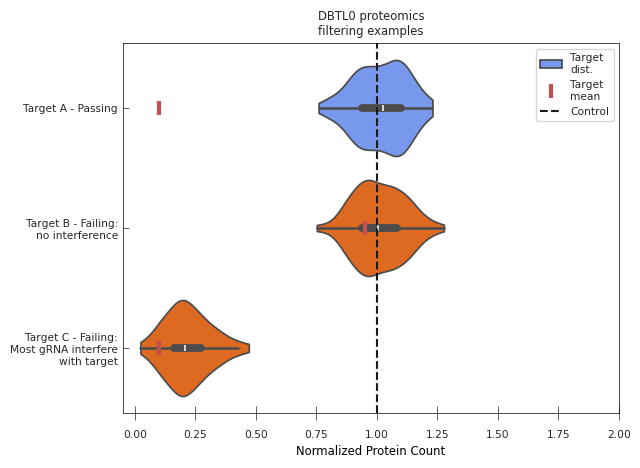

In [33]:
plot_proteomics_filter_examples()

### Plot real titers
First add the adjustText module

In [34]:
%pip install adjustText
import adjustText


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Define function to create violin plots for titer and control plot aspects

False
plot points


/tmp/ipykernel_11956/2975217691.py:10: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.violinplot(


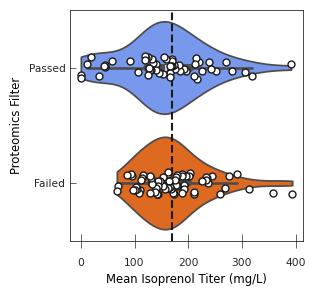

In [47]:
def plot_isoprenol_titers(df=df_target, ax = None, control_mean = control_isoprenol_mean, plot_points = False, annotate_points = False, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(figsize = (3, 3))
    print(annotate_points)
    df_sorted = df.sort_values('Isoprenol mean', ascending = False).reset_index(drop = True)
    sns.violinplot(
        data = df_sorted.sort_values('Isoprenol mean', ascending = False),
        x = 'Isoprenol mean',
        y = 'passed_filter',
        orient = 'h',
        cut = 0, 
        color = 'grey',
        order = [False, True],
        palette = palette,
        hue = 'passed_filter', 
        ax = ax
    )
    if plot_points:
        print('plot points')
        strip = sns.stripplot(
            data = df_sorted.sort_values('Isoprenol mean', ascending = False),
            x = 'Isoprenol mean',
            y = 'passed_filter',
            orient = 'h',
            color = 'white',
            order = [False, True],
            edgecolor = 'k',
            linewidth = 1,
            ax = ax
        )
        # annotate_points = False
        if annotate_points:
            pass_offsets = np.array(strip.collections[2].get_offsets())
            fail_offsets = strip.collections[3].get_offsets()
            n_to_annotate = 3
            target_df_pass = df_sorted[df_sorted['passed_filter']].reset_index(drop = True).loc[:n_to_annotate, ['Target', 'Isoprenol mean']]
            target_df_fail = df_sorted[~df_sorted['passed_filter']].reset_index(drop = True).loc[:n_to_annotate, ['Target', 'Isoprenol mean']]
            pass_text = []
            fail_text = []
            for i in range(n_to_annotate):
                assert pass_offsets[i, 0] == target_df_pass.loc[i, 'Isoprenol mean']
                pass_text.append(ax.text(pass_offsets[i, 0], pass_offsets[i, 1], target_df_pass.loc[i, 'Target']))
                fail_text.append(ax.text(fail_offsets[i, 0], fail_offsets[i, 1], target_df_fail.loc[i, 'Target']))
            adjustText.adjust_text(pass_text,expand=(1.2, 2), arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
            adjustText.adjust_text(fail_text,expand=(1.2, 2), arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
            

    ax.axvline(control_mean, c = 'k', linestyle = '--', label = 'Control\nmean')
    ax.set_ylabel('Proteomics Filter')
    ax.set_yticks([0,1])
    ax.set_yticklabels(['Passed', 'Failed'])
    ax.set_xlabel('Mean Isoprenol Titer (mg/L)')
    ax.get_legend().remove()
    if annotate_points: 
        print('returning')
        return pass_offsets, strip
    if save_flag is not None:
        figname = 'titer_violin_split_by_dbtl0_filtering'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')

annotate_points = False
if annotate_points:
    o, s= plot_isoprenol_titers(plot_points = True, annotate_points = annotate_points)
else:
    plot_isoprenol_titers(plot_points = True, annotate_points = annotate_points)

### Add schematic for figure 2
Currently empty

In [36]:
def add_schematic_2A(ax = None, image_location = './fig2_schematic.png'):
    if ax is None:
        fig, ax = plt.subplots()
    img = plt.imread(image_location)
    ax.imshow(img)
    ax.set_axis_off()

### Plot three actual datasets
TODO: Could merge this functionality with the other figure where I plot proteomics filtering. 

In [37]:
df_target.columns[-30:]

Index(['PP_4702', 'PP_4862', 'PP_4894', 'PP_5064', 'PP_5128', 'PP_5186',
       'PP_5203', 'PP_5288', 'PP_5335', 'PP_5416', 'PP_5417', 'PP_5419',
       'Isoprenol mean', 'dCas9', 'Target', 'CV[%]', 'Target:Control',
       'Target:Library_mean', 'Target:Library_Q1', 'to_keep', 'is_stat_row',
       'passed_filter', 'Filter Result', 'has_cog', 'cog_base',
       'cog_base_length', 'cog_base1', 'cog_base_function',
       'cog_base_description', 'pathway_zoom'],
      dtype='object')

In [38]:
df_target[df_target['Target'] == 'PP_0582']

,Strain,PP_0001,PP_0168,PP_0226,PP_0338,PP_0368,PP_0437,PP_0528,PP_0582,PP_0597,...,is_stat_row,passed_filter,Filter Result,has_cog,cog_base,cog_base_length,cog_base1,cog_base_function,cog_base_description,pathway_zoom
15,IY1663,1.024422,0.724068,0.574312,0.926804,1.007364,0.654505,0.854389,0.615727,0.787093,...,False,False,Failed Filter,True,I,1.0,I,Lipid transport and metabolism,Metabolism,β-Oxidation


360
360


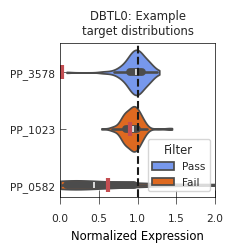

In [39]:
def plot_actual_proteomics_filtering(df = df_target, ax = None, targets = None, pass_dict = None, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(figsize = (2, 2))
    for t in targets:
        assert t in df.columns, f'ERROR: target {t} not in df columns'
    strain_rows = [strain[:2] == 'IY' for strain in df['Strain']]
    df = df.loc[strain_rows, :]
    library_expr_list = []
    target_list = []
    target_strain_expr_list = []
    filter_list = []
    for t in targets:
        assert sum(df['Target'] == t) == 1, f'ERROR: multiple strains target {t}'
        library_expr_list.extend(
            df.loc[df['Target'] != t, t].to_list()
        )
        n_data = len(df.loc[df['Target']!=t,t])
        target_list.extend([t]*n_data)
        target_strain_expr_list.extend(df.loc[df['Target'] == t, t].values)
        if pass_dict is not None:
            filter_list.extend([pass_dict[t]] * n_data)
        else:
            filter_list.extend(['Pass']*n_data)
        
    print(len(target_list))
    print(len(filter_list))
    df_plot = pd.DataFrame.from_dict(
        {
            'Normalized Expression': library_expr_list,
            'Target': target_list,
            'Filter': filter_list
        }
    )
    
    sns.violinplot(
        data = df_plot,
        y = 'Target',
        x = 'Normalized Expression',
        cut = 0,
        hue = 'Filter',
    )
    
    #Plot target in red
    target_strain_expr = np.array(target_strain_expr_list)
    idx_for_means = np.arange(len(targets))
    # target_strain_expr = [0, 1, 2]
    ax.plot(
        target_strain_expr,
        idx_for_means,
        marker = '|',
        color='r',
        markersize=10,
        markeredgewidth=3,
        label = 'Target mean',
        linewidth = 0
    )
    ax.set_xlim([0, 2])
    ax.axvline(1, c = 'k', linestyle = '--')
    ax.set_ylabel('')
    ax.set_title('DBTL0: Example\ntarget distributions')

    if save_flag:
        figname = 'filtering_examples_real_data'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')        
    
    return df_plot

passed_targets = df_target_nostats.loc[df_target_nostats['to_keep'] == True, 'Target']
failed_targets = ['PP_1023', 'PP_1664', 'PP_5128', 'PP_4012']
targets_to_plot = ['PP_3578', 'PP_1023', 'PP_0582']
pass_dict = dict(zip(targets_to_plot, ['Pass', 'Fail', 'Fail']))
df_plot = plot_actual_proteomics_filtering(
    df = df_target,
    ax = None,
    targets = targets_to_plot,
    pass_dict = pass_dict
)

### Plot bar graph of filtering results

In [40]:
def plot_filter_bar(df_filter, ax = None, out_dir = None):
    if ax is None and out_dir is not None:
        save_flag = True
    else:
        save_flag = False
    if ax is None:
        fig, ax = plt.subplots(figsize = (2, 2))
    sns.countplot(
        data = df_filter,
        x = 'Filter Result',
        hue = 'Filter Result',
        ax = ax
    )
    
    ax.set_ylabel('Number of Targets')
    ax.set_xlabel('')
    new_labels = [l.get_text().replace(' ', '\n') for l in ax.get_xticklabels()]
    ax.set_xticklabels(new_labels)
    ax.set_title('DBTL0 filtering results')
    print(df_filter['Filter Result'].value_counts())
    if save_flag:
        figname = 'dbtl0_filtering_bargraph'
        fig.savefig(OUTPUT_DIR + figname + '.pdf')
        fig.savefig(OUTPUT_DIR + figname + '.png')
        

Filter Result
Passed Filter     65
Failed Filter     58
Manually added     2
Name: count, dtype: int64


/tmp/ipykernel_11956/569711126.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


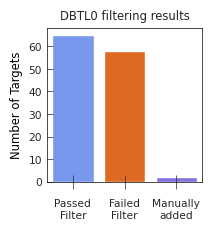

In [41]:
plot_filter_bar(df_target[df_target['Strain'] != 'NT'])

### Plot scatter of dCas9 levels and target levels for DBTL0

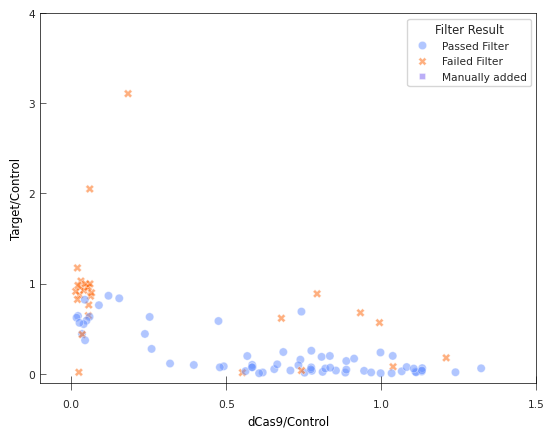

In [42]:
def plot_dcas9_target_filtering(df_target, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.scatterplot(
        df_target,
        x = 'dCas9',
        y = 'Target:Control',
        hue = 'Filter Result',
        style = 'Filter Result',
        alpha = 0.5
    )
    ax.set_xlim([-0.1, 1.5])
    ax.set_ylim([-0.1, 4])
    ax.set_xticks([0, 0.5, 1.0, 1.5])
    ax.set_yticks([0, 1, 2, 3, 4])
    ax.set_xlabel('dCas9/Control')
    ax.set_ylabel('Target/Control')

plot_dcas9_target_filtering(df_target)

In [43]:
g.ax_joint

<Axes: xlabel='dCas9', ylabel='Target:Control'>

In [75]:

x2 = x.reset_index()
N_top_left = (
    x2.loc[
    (x2['above_target_thresh'] == True) &
    (x2['above_dcas9_thresh'] == False),
    ['passed_filter', 'count']
    ]
)
N_top_left

,passed_filter,count
1,False,17
2,True,12


/usr/local/art/.venv/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


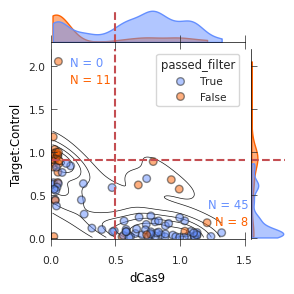

In [97]:
def plot_dcas9_target_filtering_joint(df_target, thresholds = False, out_dir = None):
    g = sns.JointGrid(
        data = df_target[df_target['Target:Control']<3],
        x = 'dCas9',
        y = 'Target:Control',
        hue = 'passed_filter',
        height = 3,
        hue_order = [True, False]
    )
    g.plot_joint(sns.scatterplot, s = 30, alpha = 0.5, linewidth = 1, edgecolor = 'k')
    g.plot_marginals(sns.kdeplot, cut = 0, bw_adjust = 0.5, fill = True, alpha = 0.5)
    # g.plot_joint(sns.kdeplot, zorder=0, levels=4, cut =0, fill = False, bw_adjust = 0.7)
    sns.kdeplot(
        data = df_target[df_target['Target:Control']<3],
        x = 'dCas9',
        y = 'Target:Control',
        zorder=0,
        levels=6,
        cut =0,
        fill = False,
        bw_adjust = 0.7,
        ax = g.ax_joint,
        c = 'k',
        linewidths = 0.5
    )
        
    g.ax_marg_x.set_xlim([-0.001, 1.5])
    g.ax_marg_y.set_ylim([-0.01, 2.2])
    g.ax_marg_x.set_xlabel('dCas9/Control')
    g.ax_marg_y.set_ylabel('Target/Control')

    if thresholds: 
        dCas9_thresh = 0.5
        target_control_thresh = 0.9
        df_plot = df_target[df_target['Target:Control']<3].copy(deep = True)
        df_plot['above_dcas9_thresh'] = df_plot['dCas9']>dCas9_thresh
        df_plot['above_target_thresh'] = df_plot['Target:Control']>target_control_thresh
        df_thresh = df_plot.loc[:, ['passed_filter', 'above_dcas9_thresh', 'above_target_thresh']].value_counts().reset_index()
        g.ax_marg_x.axvline(dCas9_thresh, c = 'r', linestyle = '--')
        g.ax_marg_y.axhline(target_control_thresh, c = 'r', linestyle = '--')
        g.ax_joint.axvline(dCas9_thresh, c = 'r', linestyle = '--')
        g.ax_joint.axhline(target_control_thresh, c = 'r', linestyle = '--')

        N_top_left = (
            df_thresh.loc[
            (df_thresh['above_target_thresh'] == True) &
            (df_thresh['above_dcas9_thresh'] == False),
            ['passed_filter', 'count']
            ]
        )

        N_bottom_right = (
            df_thresh.loc[
            (df_thresh['above_target_thresh'] == False) &
            (df_thresh['above_dcas9_thresh'] == True),
            ['passed_filter', 'count']
            ]
        )
        
        
        g.ax_joint.text(x = 0.15, y = 2, s=f"N = {0}", c = palette[0])
        g.ax_joint.text(x = 0.15, y = 1.8, s=f"N = {N_top_left.loc[N_top_left['passed_filter'] == False, 'count'].values[0]}", c = palette[1])
        g.ax_joint.text(x = 1.22, y = 0.35, s=f"N = {N_bottom_right.loc[N_bottom_right['passed_filter'] == True, 'count'].values[0]}", c = palette[0])
        g.ax_joint.text(x = 1.27, y = 0.15, s=f"N = {N_bottom_right.loc[N_bottom_right['passed_filter'] == False, 'count'].values[0]}", c = palette[1])

        return df_plot
    
    if out_dir is not None:
        figname = 'dcas9_target_downreg_jointplot'
        g.savefig(out_dir + figname + '.pdf')
        g.savefig(out_dir + figname + '.png')


x = plot_dcas9_target_filtering_joint(df_target, thresholds=True)

In [89]:
x['wierd_passer'] = (x['above_target_thresh'] == True) & (x['above_dcas9_thresh'] == False) & (x['passed_filter'] == True)
x[x['wierd_passer']]

,Strain,PP_0001,PP_0168,PP_0226,PP_0338,PP_0368,PP_0437,PP_0528,PP_0582,PP_0597,...,has_cog,cog_base,cog_base_length,cog_base1,cog_base_function,cog_base_description,pathway_zoom,above_dcas9_thresh,above_target_thresh,wierd_passer
1,IY1587,0.628591,0.637950,0.630554,0.766956,0.708363,0.840861,0.922574,0.582428,0.920302,...,True,I,1.0,I,Lipid transport and metabolism,Metabolism,β-Oxidation,False,True,True
24,IY1672,0.976167,0.627757,1.626148,0.899602,0.681912,0.864895,0.854524,1.196509,0.631044,...,True,E H,2.0,E,Amino acid transport and metabolism,Metabolism,NaN,False,True,True
45,IY2021,1.327257,0.995463,1.002555,1.091763,0.860234,0.708621,0.868106,1.115785,1.062101,...,True,C,1.0,C,Energy production and conversion,Metabolism,Oxidative phosphorylation,False,True,True
75,IY2057,0.740560,0.660576,0.051590,0.931104,0.671293,0.301417,1.023495,0.032750,0.569576,...,True,C,1.0,C,Energy production and conversion,Metabolism,TCA cycle,False,True,True
84,IY2193,0.771298,2.317660,0.721499,0.831077,0.564623,0.676355,1.331131,0.077946,0.580338,...,True,E,1.0,E,Amino acid transport and metabolism,Metabolism,NaN,False,True,True
92,IY2201,0.713897,1.417386,0.724383,0.691669,0.730301,0.901155,1.147240,0.130308,0.212101,...,True,F,1.0,F,Nucleotide transport and metabolism,Metabolism,NaN,False,True,True
95,IY2204,0.886474,2.511901,0.835625,0.943491,0.764564,1.003591,1.096146,1.307670,0.665589,...,True,F,1.0,F,Nucleotide transport and metabolism,Metabolism,NaN,False,True,True
102,IY2211,0.987028,2.759354,0.083734,0.753480,0.733951,1.551556,1.106198,0.053156,0.805409,...,True,C,1.0,C,Energy production and conversion,Metabolism,TCA cycle,False,True,True
103,IY2212,0.889621,4.056849,0.121210,0.794977,0.896101,0.431349,1.775955,0.076947,0.161405,...,True,C,1.0,C,Energy production and conversion,Metabolism,TCA cycle,False,True,True
104,IY2214,0.940060,0.895305,0.939097,0.735090,0.541137,0.915253,1.372694,0.160323,1.001963,...,True,C,1.0,C,Energy production and conversion,Metabolism,TCA cycle,False,True,True


<Axes: xlabel='dCas9', ylabel='Target:Control'>

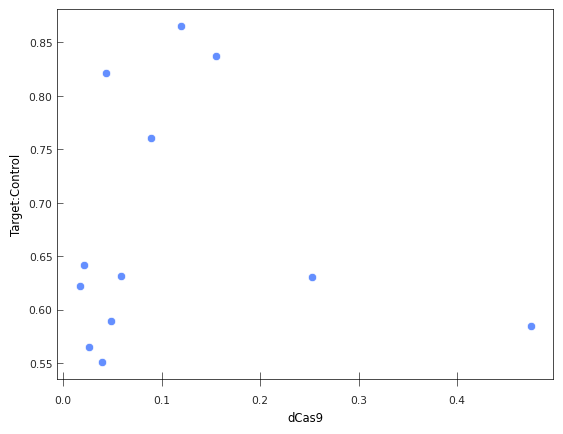

In [94]:
sns.scatterplot(x[x['wierd_passer']], x = 'dCas9', y = 'Target:Control')

/usr/local/art/.venv/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


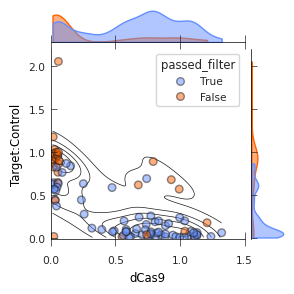

In [64]:
def plot_dcas9_target_filtering_joint(df_target, out_dir = None):
    g = sns.JointGrid(
        data = df_target[df_target['Target:Control']<3],
        x = 'dCas9',
        y = 'Target:Control',
        hue = 'passed_filter',
        height = 3,
        hue_order = [True, False]
    )
    g.plot_joint(sns.scatterplot, s = 30, alpha = 0.5, linewidth = 1, edgecolor = 'k')
    g.plot_marginals(sns.kdeplot, cut = 0, bw_adjust = 0.5, fill = True, alpha = 0.5)
    # g.plot_joint(sns.kdeplot, zorder=0, levels=4, cut =0, fill = False, bw_adjust = 0.7)
    sns.kdeplot(
        data = df_target[df_target['Target:Control']<3],
        x = 'dCas9',
        y = 'Target:Control',
        zorder=0,
        levels=6,
        cut =0,
        fill = False,
        bw_adjust = 0.7,
        ax = g.ax_joint,
        c = 'k',
        linewidths = 0.5,
    )
        
    g.ax_marg_x.set_xlim([-0.001, 1.5])
    g.ax_marg_y.set_ylim([-0.01, 2.2])
    g.ax_marg_x.set_xlabel('dCas9/Control')
    g.ax_marg_y.set_ylabel('Target/Control')
    if out_dir is not None:
        figname = 'dcas9_target_downreg_jointplot'
        g.savefig(out_dir + figname + '.pdf')
        g.savefig(out_dir + figname + '.png')


plot_dcas9_target_filtering_joint(df_target)

## Save individual figures

/tmp/ipykernel_11956/4029515640.py:60: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_11956/4029515640.py:75: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  sns.stripplot(


360
360


/tmp/ipykernel_11956/569711126.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)
/tmp/ipykernel_11956/2975217691.py:10: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.violinplot(


Filter Result
Passed Filter     65
Failed Filter     58
Manually added     2
Name: count, dtype: int64
False
plot points


/usr/local/art/.venv/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


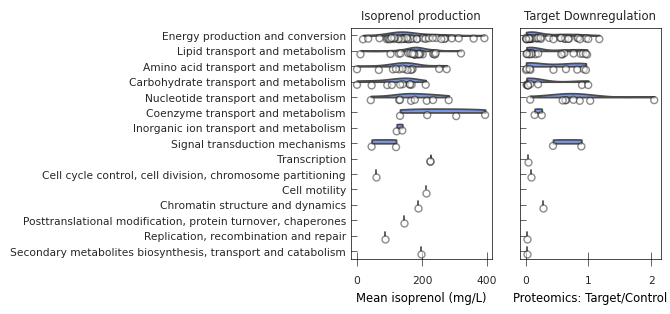

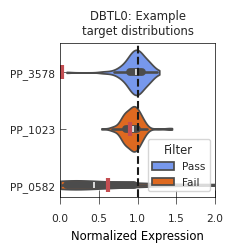

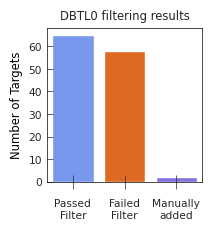

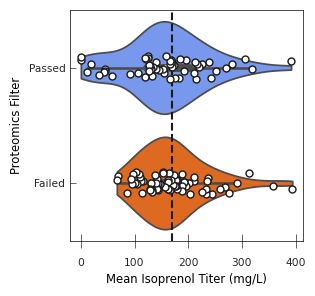

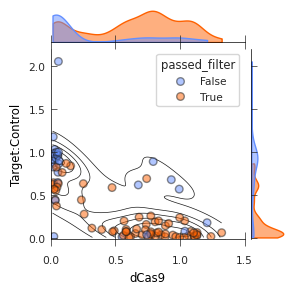

In [48]:
plot_distributions_by_cog(out_dir=OUTPUT_DIR)
df_plot = plot_actual_proteomics_filtering(
    df = df_target,
    ax = None,
    targets = targets_to_plot,
    pass_dict = pass_dict,
    out_dir = OUTPUT_DIR
)
plot_filter_bar(
    df_target[df_target['Strain'] != 'NT'],
    out_dir = OUTPUT_DIR
)
plot_isoprenol_titers(
    plot_points = True,
    annotate_points = False,
    out_dir = OUTPUT_DIR
)
plot_dcas9_target_filtering_joint(
    df_target,
    out_dir = OUTPUT_DIR
)

## Set up figure

In [46]:
# f = plt.figure(figsize = (8, 10.5))
# #Add axis for the schematic
# ax_schematic = f.add_axes(
#     rect = (0, .6, 0.95, .4), #left, bottom, width, height
#     frameon = True
# )
# add_schematic_2A(ax_schematic)

# ax_filter_example = f.add_axes(rect = (0.2, 0.3, 0.23, 0.25))
# plot_proteomics_filter_examples(ax_filter_example)

# ax_filter_results = f.add_axes(rect = (0.5, 0.3, 0.23, 0.25))
# targets_to_plot = ['PP_3578', 'PP_1023', 'PP_0582']
# pass_dict = dict(zip(targets_to_plot, ['Pass', 'Fail', 'Fail']))

# df_plot = plot_actual_proteomics_filtering(
#     df = df_target,
#     ax = ax_filter_results,
#     targets = targets_to_plot,
#     pass_dict = pass_dict
    
# )

# ax_filter_bargraph = f.add_axes(rect = (0.8, 0.3, 0.15, 0.25))
# plot_filter_bar(df_target, ax_filter_bargraph)

# ax_titer = f.add_axes(rect = (0.1, 0.05, 0.45, 0.2))
# plot_isoprenol_titers(df = df_target, ax = ax_titer, plot_points=True, annotate_points=False)
# ax_titer.get_legend().set_visible(False)

# ax_dcas9 = f.add_axes(rect = (0.6, 0.05, 0.35, 0.2))
# plot_dcas9_target_filtering(df_target, ax = ax_dcas9)

# label_offsets = np.array([-0.04, 0.02])
# # for a, l in zip(f.get_axes(), 'ABCDEF'):
# #     ax_pos = a.get_position().bounds
# #     if l == 'A':
# #         offset = np.array([0, 0])
# #     elif l == 'E' or l == 'F':
# #         offset =  np.array([-0.04, -0.01])
# #     else:
# #         offset = label_offsets
# #     text_x = ax_pos[0] + offset[0]
# #     text_y = ax_pos[1]+ax_pos[3] + offset[1]
# #     print(text_x, text_y)
# #     f.text(text_x, text_y, l, fontsize = 14)

# for a, l in zip(f.get_axes()[1:], 'EFGHI'):
#     ax_pos = a.get_position().bounds
#     if l == 'H' or l == 'I':
#         offset =  np.array([-0.04, -0.01])
#     else:
#         offset = label_offsets
#     text_x = ax_pos[0] + offset[0]
#     text_y = ax_pos[1]+ax_pos[3] + offset[1]
#     print(text_x, text_y)
#     f.text(text_x, text_y, l, fontsize = 14)

# f.savefig('FIGURE3.png', bbox_inches=None)
# f.savefig('FIGURE3.pdf')